# Esercizio 1

In [1]:
from scipy.stats import norm

mu = 220
sig = 8
x = 230

p = norm.sf(x, mu, sig)
print(f'Probabilità: {p}')

Probabilità: 0.10564977366685535


In [2]:
# (P <= 225) - (P 210)

p = norm.cdf(225, mu, sig) - norm.cdf(210, mu, sig)
print(f'Probabilità: {p}')

Probabilità: 0.6283646972844441


In [3]:
# Calcolo della media e della deviazione standard del peso della scatola
mu10 = mu * 10
sig10 = sig * 10

# P( x > 2250 )
probabilita = norm.sf(2250, mu10, sig10)

print(f"Probabilità: {probabilita}")

Probabilità: 0.26598552904870054


# Esercizio 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

x = np.array([0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5])
y = np.array([-1.42, -1.39, -1.55, -1.89, -2.43, -3.15, -4.05, -5.15, -6.43, -7.89])

n = x.size
k = 2

x1 = np.ones(n)
x2 = x

X = np.zeros((n, k))
X[:,0] = x1
X[:,1] = x2

XX = np.linalg.pinv(X)

b = XX@y
print(f'Stimatori per b0 e b1: {np.round(b, 3)}\n')

alpha = 0.05
y_hat = X@b
r = y - y_hat

s2 = np.sum(r**2)/(n-k)
s = np.sqrt(s2)
M = np.linalg.inv(X.T @ X)

T = t.ppf(1-alpha/2, n-k)
for i in range(b.size):
    A = b[i] - s*np.sqrt(M[i][i]) * T
    B = b[i] + s*np.sqrt(M[i][i]) * T
    print(f"Intervalli di confidenza per b{i}: ]{A:.3f}, {B:.2f}[")

x_bar = np.mean(x)
y_bar = np.mean(y)
R2 = np.sum((y_hat-y_bar)**2)/np.sum((y-y_bar)**2)
print(f'Coefficiente di determinazione: {R2:.2f}')

Stimatori per b0 e b1: [ 0.422 -2.878]

Intervalli di confidenza per b0: ]-0.773, 1.62[
Intervalli di confidenza per b1: ]-3.648, -2.11[
Coefficiente di determinazione: 0.90


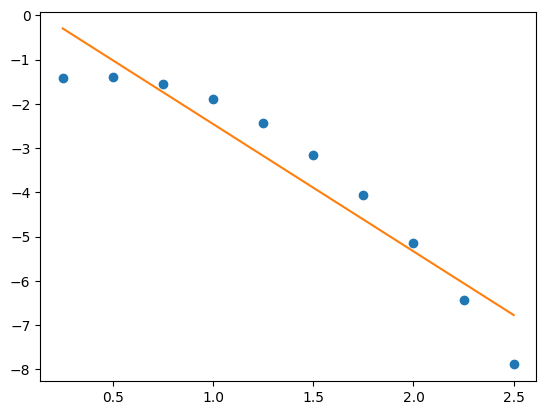

In [5]:
Y = b[0] + b[1]*x2
plt.plot(x, y, 'o')
plt.plot(x, Y)
plt.show()

Stimatori per b0 e b1: [-1.633  1.232 -1.495]



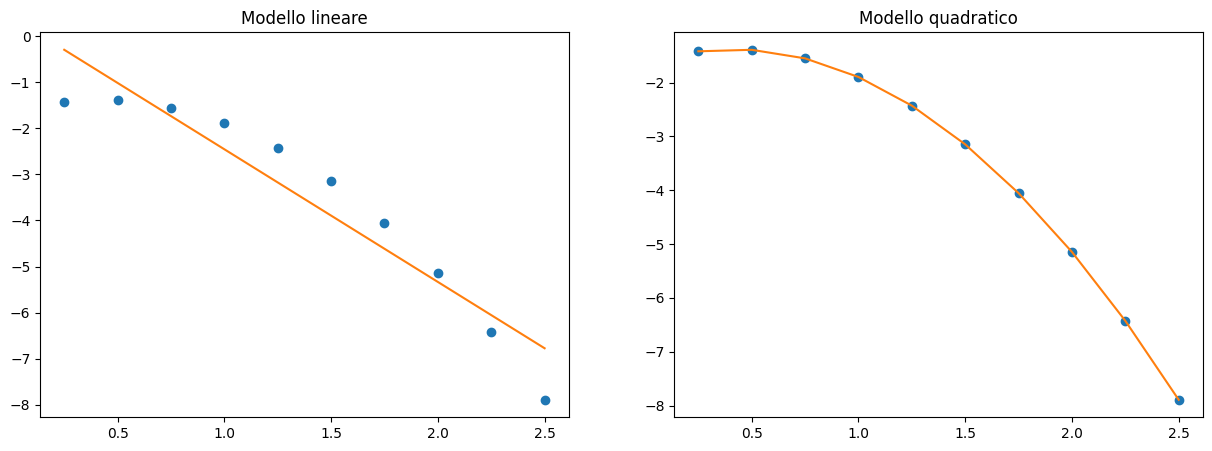

In [6]:
k = 3

x1 = np.ones(n)
x2 = x
x3 = x**2

X = np.ones((n, k))
X[:, 0] = x1
X[:, 1] = x2
X[:, 2] = x3

XX = np.linalg.pinv(X)

b = np.dot(XX, y)
print(f'Stimatori per b0 e b1: {np.round(b, 3)}\n')

Y2 = b[0]*x1 + b[1]*x2 + b[2]*x3

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5)) # 1 riga e due colonne

ax1.set_title("Modello lineare")
ax1.plot(x, y, 'o')
ax1.plot(x, Y)

ax2.set_title("Modello quadratico")
ax2.plot(x, y, 'o')
ax2.plot(x, Y2)

plt.show()

In [7]:
y_hat = X@b
R2 = np.sum((y_hat-y_bar)**2)/np.sum((y-y_bar)**2)
print(f'Coefficiente di determinazione: {R2:.2f}')

# IL VALORE DEL COEFFICIENTE È NETTAMENTE PIÙ ALTO 
# PER TANTO QUESTO MODELLO, ESSENDO PIÙ COMPLESSO, 
# APPROSSIMA MEGLIO LA DISTRIB. DEI DATI

Coefficiente di determinazione: 1.00


# Esercizio 3

In [8]:
x = np.array([36.6, 36.2,36.3, 36.4, 36.6, 36.6, 36.7, 36.7, 36.7, 36.7,36.8, 36.8,36.8,
              36.9, 36.9, 36.9, 36.9, 37.0,37.0, 37.1,37.1, 37.1, 37.2, 37.2, 37.2])

n = x.size
mu = np.mean(x)
print(f'Media campionaria: {mu:.3f}')

S = np.std(x, ddof=1)
print(f'Deviazione standard campionaria: {S:.3f}')

alpha = 0.01
T = t.ppf(1-alpha/2, n-1) 
print(f'T: {T}')

left = mu - S/np.sqrt(n)*T
right = mu + S/np.sqrt(n)*T
print(f'Intervallo: ]{left:.3f}, {right:.3f}[\n') # Con una probabilità al 99% ricade qui

Media campionaria: 36.816
Deviazione standard campionaria: 0.273
T: 2.796939504772804
Intervallo: ]36.663, 36.969[



In [9]:
# Test bilatero
# H0 -> mu = mu_0
# H1 -> mu != mu_0

alpha = 0.05
mu_0 = 37

T0 = (mu-mu_0)/S * np.sqrt(n)
print(f'T0: {T0:.3f}')

# Test unilatero a destra
T = t.ppf(1-alpha, n-1)
print(f't: {T:.3f}')

cond = T0 > T
print("Rigetto l'ipotesi nulla" if cond else "Non ho elementi sufficienti per rigettare l'ipotesi nulla")

T0: -3.365
t: 1.711
Non ho elementi sufficienti per rigettare l'ipotesi nulla


In [10]:
Ft = t.cdf(T0, n-1)
p = 1-Ft
print(f'P-value: {p}')

P-value: 0.9987165493707575


In [13]:
beta = 0.1 
delta = np.abs(mu-36.8) # quanto ci stacchiamo dalla media vera

PHI_alpha = norm.ppf(1-alpha/2)
print(f'Phi: {PHI_alpha:.3f}')

check = -PHI_alpha-delta*np.sqrt(n)/sig 
print(f'Vale {check:.3f} <= -3, quindi la distribuzione approssima una normale') 

PHI_beta = norm.ppf(1-beta)
dim_camp = (PHI_alpha+PHI_beta)**2 * (S**2/delta**2)
print(f"Dimensione del campione: {int(dim_camp)}")

Phi: 1.960
Vale -1.970 <= -3, quindi la distribuzione approssima una normale
Dimensione del campione: 3067
